To find the minimizer and the minimum function value of $f(x) = x_1^2 + 4x_{1}x_{2} +  1600x_2^2$
, we need to find the values of $x_{1}$ and $x_{2}$ that minimize the function.

 we'll take the partial derivatives of $f$ with respect to $x_{1}$ and $x_{2}$ and set them equal to zero.

Let's compute the partial derivatives:

1. Partial derivative with respect to $x_{1}$ :

$$
\frac{\partial f}{\partial x_1} = 2x_{1} + 4x_{2}
$$

2. Partial derivative with respect to $x_{2}$ :
$$
\frac{\partial q}{\partial x_2} = 4x_{1} + 3200x_{2}
$$
Now, set each partial derivative equal to zero and solve for $x_{1}$ and $x_{2}$ :


equ1. $2x_{1} + 4x_{2}=0$

equa2. $4x_{1} + 3200x_{2}=0$

From Equation 1, and  From Equation 2: we find the value of gthe $x_{1}$ and $x_{2}$



 form the above equation we find $ x_1 = 0$, and  $x_2 = 0$.

Therefore, the solution to the system of equations is $x_{1} = 0$ and $x_2 = 0$.

So, the minimizer is $x=(0,0)$, and the minimum value of $f(x)$ is 0


 **the Hessian matrix is not positive semidefinite everywhere**

The Hessian matrix  H  for q(x) is given by:

If $x_1 = 0 $ and $x_2 = 0$,


$\therefore\nabla^2 f(\mathbf{x})
=
\begin{bmatrix}
  2 & 4 \\ 4 & 3200
\end{bmatrix}$


To find the $\textbf{conditional number} \hspace{2mm} \kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, we have a built-in function in the numpy package.where  λ is eigen vlaue of hessian .

In [3]:
import numpy as np


In [4]:
def fx(x):
  fx=x[0]**2+4*x[0]*x[1]+1600*x[1]**2
  return np.array(fx)
def grad_fx(x):
  grad=[2*x[0]+4*x[1],4*x[0]+3200*x[1]]
  return np.array(grad)
def hes_fx(x):
  hes=[[2,4],[4,3200]]
  return np.array(hes)
x=[1,1600]
k=0
tau=1e-4
#pk=-grad_fx(x)
#while np.linalg.norm(pk)>tau:

grad_fx([200,200])   # checking

array([  1200, 640800])

In [5]:
def condition_numb(x):  # find the condition number
  w, v = np.linalg.eig(hes_fx(x))
  max_ev=np.max(w)  # eigen value
  min_ev=np.min(w)
  cond_no=max_ev/min_ev
  return cond_no
condition_numb([1,1])
print(f'condition number ={condition_numb([0,0])}')

condition number =1604.015040725209


#Answer 1(2)

**Ans**
Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix. This is so helpful in fasterness of the algorithm.

$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{2} & 0 \\ 0 & \frac{1}{3200}
\end{bmatrix}$
The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k$

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.


Because of such choice of $\mathbf{Q}$, condition number of in the gradient descent scheme is decreasing almost to $1$ so that out algorithm with scaling becomes so fast.

In [6]:
def Dk(x):
  return np.array([[1/2,0],[0,1/3200]])

ro=0.9
def backtracking(x,ro):
  gamma=0.5
  alpha=1
  pk=-1*np.array(grad_fx(x))     #pk=-grad_fx(x)

  k=0
  while np.array(fx(np.array(x)+alpha*pk))>(np.array(fx(x))+gamma*alpha*(np.array(grad_fx(x))@pk)):
    alpha=ro*alpha
    k+=1
  return alpha
backtracking([100,100],ro)

0.0002996906728784534

In [7]:
#without scaling back track

def grad_descent_without_scalling(x0):
  iteration=[]
  optimizers=[]
  optimal_value=[]
  tau=1e-12
  ro=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

  for r in ro:
    tau=1e-12
    alpha=backtracking(x0,r)

    x=x0
    pk=-grad_fx(x)
    fx_norm=np.linalg.norm(pk)
    #print(fx_norm)
    k=0
    while fx_norm>tau:

      x=x+alpha*pk
      pk=-grad_fx(x)
      fx_norm=np.linalg.norm(pk)
      alpha=backtracking(x,r)
      k=k+1
    iteration.append(k)
    optimizers.append(x)
    optimal_value.append(fx(x))
  return iteration,optimizers,optimal_value
x=[1,4000]
grad_descent_without_scalling(x)

([3583, 1331, 538, 5615, 16981, 5961, 15287, 37849, 13538],
 [array([-4.86897154e-13,  5.56578299e-16]),
  array([-4.79006925e-13,  5.77859847e-16]),
  array([-4.12345553e-13,  4.98693146e-16]),
  array([-4.86809153e-13,  6.52330287e-16]),
  array([-4.77038750e-13,  6.86254384e-16]),
  array([-4.92016016e-13,  6.63916164e-16]),
  array([-4.78952422e-13,  5.09080727e-16]),
  array([-4.44250589e-13,  6.83670379e-16]),
  array([-4.87654555e-13,  5.39105672e-16])],
 [array(2.364805e-25),
  array(2.28874714e-25),
  array(1.69604231e-25),
  array(2.36393766e-25),
  array(2.27010001e-25),
  array(2.41478386e-25),
  array(2.28834781e-25),
  array(1.96891551e-25),
  array(2.37220391e-25)])

In [8]:
x=[1,4000]
def arg_eta(x):
  n=(2*x[0]*(x[0]+2*x[1])+4*x[0]*(800*x[1]+x[0])+4*x[1]*(x[0]+2*x[1])+3200*x[1]*(800*x[1]+x[0]))/((x[0]+2*x[1])**2+2*((x[0]+2*x[1])*(800*x[1]+x[0]))+3200*((800*x[1]+x[0])**2))
  if n>=0:
    n=n
  if n<0:
    n=0
  return n
arg_eta(x)

0.0012500019514105828

In [9]:
def get_alpha_with_scaling(xk, alpha0, ro, gamma, Dk):   # now use the gradient descent with scalling
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Dk@pk):
    alpha = ro*alpha
  return alpha
hue=Dk([1,1600])
get_alpha_with_scaling([1,1600], 1, 0.9, 0.5, hue)

0.9

In [10]:
#with scale back track
def grad_descent_with_scale(x0):

  iteration=[]
  optimizers=[]
  optimal_value=[]

  ro=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  for r in ro:
    tau=1e-12
    x=x0
    pk=-grad_fx(x)
    k=0
    a=1
    gamma=0.5
    fx_norm=np.linalg.norm(pk)
    alpha=a
    while fx_norm>tau:
      dk=np.array(Dk(x))
      x=np.array(x+alpha*np.dot(dk,pk))
      pk=-grad_fx(x)
      fx_norm=np.linalg.norm(pk)
      alpha=get_alpha_with_scaling(x, a, r, 0.5, dk)
      k=k+1
    optimizers.append(x)
    iteration.append(k)
    optimal_value.append(fx(x))
  return iteration,optimizers,optimal_value
  x=[1,1600]
grad_descent_with_scale([1,4000])

([15, 16, 16, 16, 17, 17, 19, 25, 115],
 [array([-4.39447021e-15,  2.44139938e-16]),
  array([-9.76561279e-16,  4.88265991e-18]),
  array([-1.22070198e-15,  4.57744598e-18]),
  array([-1.95312408e-15,  3.66180420e-18]),
  array([-1.22375412e-15,  3.05156660e-18]),
  array([-1.75976489e-15,  2.92941254e-18]),
  array([-1.54752679e-15,  2.57539411e-18]),
  array([-1.70489582e-15,  2.36523646e-18]),
  array([-1.78952383e-15,  2.25730189e-18])],
 [array(1.10386801e-28),
  array(9.72743654e-31),
  array(1.50128735e-30),
  array(3.80753995e-30),
  array(1.49753597e-30),
  array(3.0898825e-30),
  array(2.38950944e-30),
  array(2.89949079e-30),
  array(3.19439023e-30)])

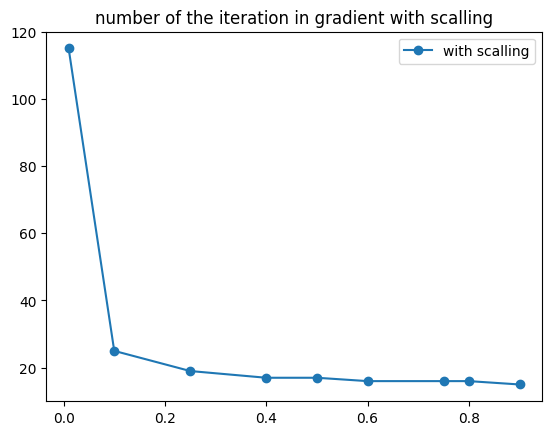

In [11]:
import matplotlib.pyplot as plt
ro=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
plt.plot(ro,grad_descent_with_scale([1,4000])[0],marker='o',label='with scalling')#grad_descent_without_scale(x)
plt.legend()
plt.title('number of the iteration in gradient with scalling')
plt.show()

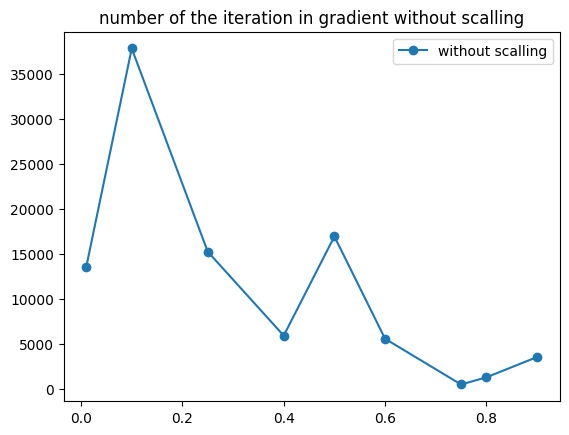

In [12]:
import matplotlib.pyplot as plt
ro=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
plt.plot(ro,grad_descent_without_scalling([1,4000])[0],marker='o', label = 'without scalling')
plt.legend()
plt.title('number of the iteration in gradient without scalling')
plt.show()

In [13]:
#with scale
def grad_descent_with_scale(x0):
  iteration=[]
  optimizers=[]
  optimal_value=[]
  x=x0
  k=0
  ro=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  tau=1e-12
  pk=-grad_fx(x)
  fx_norm=np.linalg.norm(pk)
  while fx_norm>tau:
    dk=Dk(x)
    eta =arg_eta(x)
 # generate the value
    x=x+eta*np.dot(dk,pk)
    pk=-grad_fx(x)
    fx_norm=np.linalg.norm(pk)
    #alpha=backtracking(x,r)
    k=k+1
  iteration.append(k)
  optimizers.append(x)
  optimal_value.append(fx(x))
  return iteration,optimizers,optimal_value
x=[1,1600]
grad_descent_with_scale([1,4000])


([36385], [array([-1.28655312e-14,  3.28459883e-16])], [array(3.21236082e-28)])

In [ ]:
# #gradient prev lab
# def gradient_descent_step_line_back_track(x0):


#     new_optimal=[]
#     coordinates=[]
#     iteration=[]

#     rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]


#     for r in rho:
#       tau=1e-12
#       coordinate_min=[]
#       x=np.copy(x0)
#       pk=-grad_fx(x)
#       fx_norm=np.linalg.norm(pk)
#       k=0

#       x_c=[]
#       while fx_norm > tau:
#         alpha=backtracking(x,r)
#         #print(f"alpha is: {alpha0} , new alpha is: {alpha}")
#         #print(f'for {alpha} no of iteration is:{a}')
#         x=x+alpha*pk
#         pk=-1*grad_fx(x)
#         fx_norm=np.linalg.norm(pk)

#         k=k+1
#       new_optimal.append(fx(x))
#       coordinates.append(x)
#       iteration.append(k)

#     return iteration,coordinates,new_optimal
# gradient_descent_step_line_back_track([1,4000])

([3583, 1331, 538, 5615, 16981, 5961, 15287, 37849, 13538],
 [array([-4.86897154e-13,  5.56578299e-16]),
  array([-4.79006925e-13,  5.77859847e-16]),
  array([-4.12345553e-13,  4.98693146e-16]),
  array([-4.86809153e-13,  6.52330287e-16]),
  array([-4.77038750e-13,  6.86254384e-16]),
  array([-4.92016016e-13,  6.63916164e-16]),
  array([-4.78952422e-13,  5.09080727e-16]),
  array([-4.44250589e-13,  6.83670379e-16]),
  array([-4.87654555e-13,  5.39105672e-16])],
 [array(2.364805e-25),
  array(2.28874714e-25),
  array(1.69604231e-25),
  array(2.36393766e-25),
  array(2.27010001e-25),
  array(2.41478386e-25),
  array(2.28834781e-25),
  array(1.96891551e-25),
  array(2.37220391e-25)])

observation:
here we can see that the grad descent with scaling is very much faster than grad descent without sacling and by plotting the iterations with values of rho we observe that at a certain value of rho we found convergence of iteration and after that point we move away from that point.
